In [300]:
import requests
import pandas as pd
import geopandas as gpd
import zipfile
import io
import os
import matplotlib.pyplot as plt
import fiona
import seaborn as sns
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as cx

## Built-Up Areas

In [4]:
# API Key and Product Information
API_KEY = "OlA1TrhMwc7h6s4WVt5q46kPqBOgU8a2"
PRODUCT_ID = "BuiltUpAreas"

In [5]:
# Download link
DOWNLOADS_URL = f"https://api.os.uk/downloads/v1/products/{PRODUCT_ID}/downloads?key={API_KEY}"

In [6]:
# Request to download
response = requests.get(DOWNLOADS_URL)

In [11]:
# Convert response to JSON (a list)
list= response.json()

In [12]:
# Convert list to  DataFrame
list_df = pd.DataFrame(list)

In [13]:
list_df.head()

,md5,size,url,format,area,fileName
0,0c2e2b4e51e45c0010e45736a65b23a0,31601598,https://api.os.uk/downloads/v1/products/BuiltU...,CSV,GB,OS_Open_Built_Up_Areas_CSV.zip
1,33e6c9c80962792aa47738d3d1123c48,41521861,https://api.os.uk/downloads/v1/products/BuiltU...,GeoPackage,GB,OS_Open_Built_Up_Areas_GeoPackage.zip


In [14]:
# Filter fthe GeoPackage format from the dataframe
gpkg_row = list_df[list_df['format'] == 'GeoPackage'].iloc[0]
gpkg_url = gpkg_row['url']

In [15]:
# Download the ZIP file
zip_response = requests.get(gpkg_url)

In [ ]:
# Extract  ZIP 
with zipfile.ZipFile(io.BytesIO(zip_response.content)) as z:
    z.extractall('built_up_area_data')  

In [24]:
# Read the file
path= '/Users/naiemegolzari/Desktop/UniLeeds/Creative Coding for Real World Problems/Topic 4/built_up_area_data/os_open_built_up_areas.gpkg'
built_up = gpd.read_file(path)

/Users/naiemegolzari/Library/Python/3.9/lib/python/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'os_open_built_up_areas.gpkg': 'os_open_built_up_areas' (default), 'os_open_built_up_extents', 'os_open_non_built_up_extents'. Specify layer parameter to avoid this warning.
  result = read_func(


In [25]:
built_up.head()

,gsscode,name1_text,name1_language,name2_text,name2_language,areahectares,geometry_area_m,geometry
0,S45000832,A'Choingheal,gla,Connel,eng,38.00,380000.0,"MULTIPOLYGON (((191450 733950, 191450 733925, ..."
1,S45000833,A'Chorpaich,gla,Corpach,eng,111.75,1117500.0,"MULTIPOLYGON (((208425 776375, 208400 776375, ..."
2,E63010387,Abberley,None,None,None,48.44,484375.0,"MULTIPOLYGON (((374450 266700, 374450 266725, ..."
3,E63007254,Abbeytown,None,None,None,30.69,306875.0,"MULTIPOLYGON (((317275 550175, 317250 550175, ..."
4,E63009334,Abbots Bromley,None,None,None,68.56,685625.0,"MULTIPOLYGON (((407625 324200, 407625 324225, ..."


<Axes: >

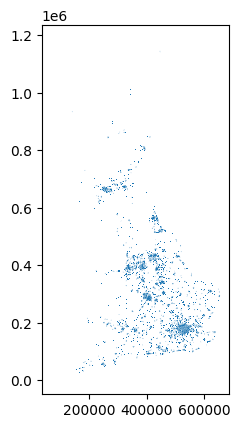

In [26]:
built_up.plot()

In [29]:
built_up.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
#Region border
YorkshireAndHumber=gpd.read_file('YorkshireAndTheHumberRegion.geojson')

In [32]:
YorkshireAndHumber.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<Axes: >

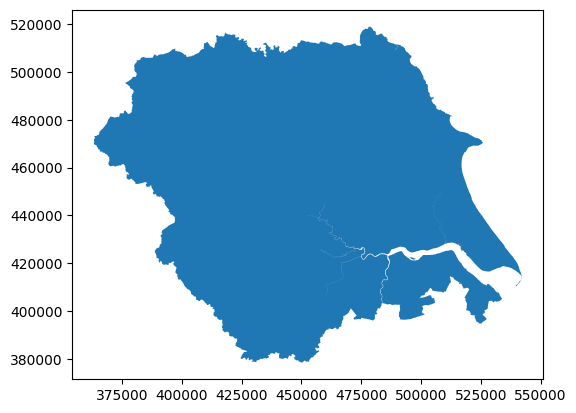

In [33]:
YorkshireAndHumber.plot()

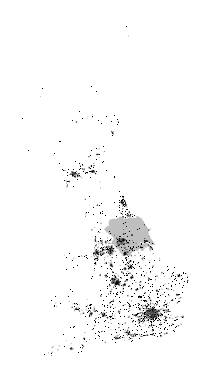

In [138]:
fig, ax = plt.subplots(1,1)
YorkshireAndHumber.plot(ax = ax, color = 'gray', linewidth = 0.5, alpha=0.5)
built_up.plot(ax = ax, facecolor = 'black', linewidth = 0.2)
ax.set_axis_off()

In [42]:
region_built_up = gpd.clip(built_up, YorkshireAndHumber)

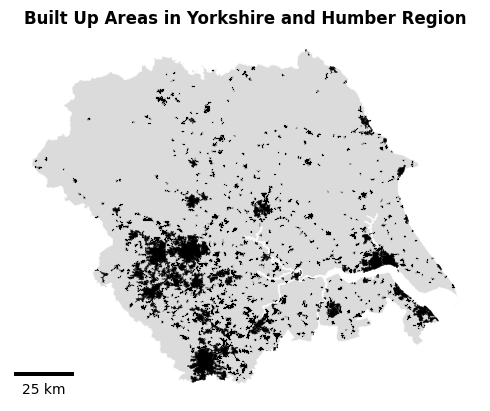

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

YorkshireAndHumber.plot(ax=ax, color='lightgrey', edgecolor='white', alpha=0.8)
region_built_up.plot(ax=ax, color='black', edgecolor='black', linewidth=0.1)

ax.set_title('Built Up Areas in Yorkshire and Humber Region', fontsize=12, fontweight= 'bold')
ax.set_axis_off()

scalebar = ScaleBar(dx=1, location='lower left')
ax.add_artist(scalebar)

plt.tight_layout()
plt.show()

In [58]:
region_built_up.head()

,gsscode,name1_text,name1_language,name2_text,name2_language,areahectares,geometry_area_m,geometry
4352,E63008511,Langold,None,None,None,66.56,665625.0,"POLYGON ((457875 387350, 457850 387350, 457850..."
3501,E63008461,Harworth and Bircotes,None,None,None,324.31,3243125.0,"MULTIPOLYGON (((462000 392700, 461995.891 3927..."
556,E63008445,Bawtry,None,None,None,117.25,1172500.0,"MULTIPOLYGON (((465175 392625, 465185.247 3926..."
7503,E63008442,Tickhill,None,None,None,170.63,1706250.0,"MULTIPOLYGON (((458450 393225, 458450 393200, ..."
343,E63008431,Austerfield,None,None,None,55.88,558750.0,"MULTIPOLYGON (((465850 394700, 465850 394725, ..."


## Agricultural Land

In [47]:
Agri_class= gpd.read_file('Agricultural_Land_Classification_Post_1988_-5165453828052933569.geojson')

In [48]:
Agri_class.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
Agri_class= Agri_class.to_crs(epsg=27700)

In [50]:
Agri_class.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [55]:
Agri_class.head()

,OBJECTID_1,OBJECTID,GEOGEXT,JOB_NUMBER,RPT,ALC_GRADE,HECTARES,RPT_JOBNUM,Published_,geometry
0,1,1,9,043\93,Leeds,Grade 3b,2.8,Leeds_043\93,http://publications.naturalengland.org.uk/publ...,"POLYGON ((523223.435 425263.489, 523233.435 42..."
1,2,2,9,043\93,Leeds,Grade 3a,0.7,Leeds_043\93,http://publications.naturalengland.org.uk/publ...,"POLYGON ((523152.438 425059.49, 523134.438 425..."
2,3,3,9,043\93,Leeds,Grade 3a,0.2,Leeds_043\93,http://publications.naturalengland.org.uk/publ...,"POLYGON ((523362.435 425215.492, 523381.435 42..."
3,4,4,81,101\94,Wolverhampton,,13.6,Wolverhampton_101\94,http://publications.naturalengland.org.uk/publ...,"POLYGON ((415260.427 314289.898, 415352.426 31..."
4,5,5,8,019\89,Wolverhampton,Grade 3b,66.0,Wolverhampton_019\89,http://publications.naturalengland.org.uk/publ...,"POLYGON ((400320.422 305573.797, 400328.422 30..."


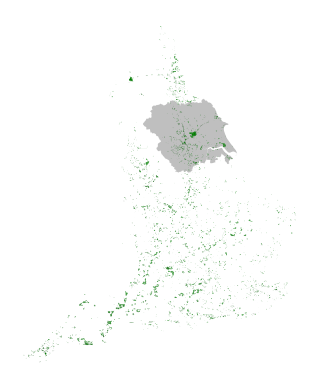

In [135]:
fig, ax = plt.subplots(1,1)
YorkshireAndHumber.plot(ax = ax, color = 'gray', linewidth = 0.5, alpha=0.5)
Agri_class.plot(ax = ax, facecolor = 'green', linewidth = 0.2)
ax.set_axis_off()

In [61]:
Land_Class = gpd.clip(Agri_class, YorkshireAndHumber)

In [62]:
Land_Class.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5947 entries, 33520 to 28181
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  5947 non-null   int32   
 1   OBJECTID    5947 non-null   int32   
 2   GEOGEXT     5947 non-null   object  
 3   JOB_NUMBER  5947 non-null   object  
 4   RPT         5947 non-null   object  
 5   ALC_GRADE   5947 non-null   object  
 6   HECTARES    5947 non-null   float64 
 7   RPT_JOBNUM  5947 non-null   object  
 8   Published_  5947 non-null   object  
 9   geometry    5947 non-null   geometry
dtypes: float64(1), geometry(1), int32(2), object(6)
memory usage: 464.6+ KB


In [73]:
Land_Class['ALC_GRADE'].value_counts()

ALC_GRADE
Grade 3b        1623
Grade 3a        1543
Other           1472
Grade 2          940
Grade 4          175
Grade 1           78
Not Surveyed      70
Grade 5           46
Name: count, dtype: int64

In [ ]:
# Filter to ony higher quality lands
#Land_Class_A = Land_Class[Land_Class['ALC_GRADE'].isin(['Grade 1', 'Grade 2'])]

In [ ]:
#Land_Class_A.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1018 entries, 33517 to 28315
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  1018 non-null   int32   
 1   OBJECTID    1018 non-null   int32   
 2   GEOGEXT     1018 non-null   object  
 3   JOB_NUMBER  1018 non-null   object  
 4   RPT         1018 non-null   object  
 5   ALC_GRADE   1018 non-null   object  
 6   HECTARES    1018 non-null   float64 
 7   RPT_JOBNUM  1018 non-null   object  
 8   Published_  1018 non-null   object  
 9   geometry    1018 non-null   geometry
dtypes: float64(1), geometry(1), int32(2), object(6)
memory usage: 79.5+ KB


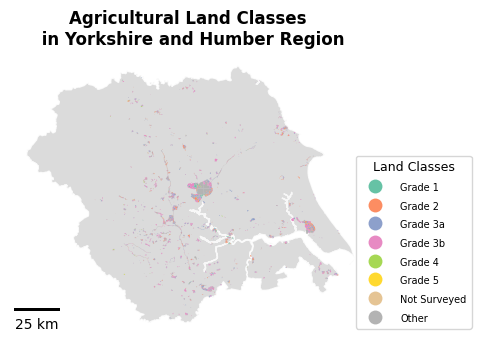

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

YorkshireAndHumber.plot(ax=ax, color='lightgrey', edgecolor='white', alpha=0.8)
land_plot = Land_Class.plot(ax=ax, column='ALC_GRADE', cmap='Set2', legend=True, legend_kwds={'bbox_to_anchor': (1.3, 0),'loc': 'lower right', 'title': 'Land Classes'})
ax.set_title('Agricultural Land Classes \n in Yorkshire and Humber Region', fontsize=12, fontweight='bold')
ax.set_axis_off()

scalebar = ScaleBar(dx=1, location='lower left')
ax.add_artist(scalebar)

legend = ax.get_legend()
legend.set_title('Land Classes', prop={'size': 9})

for text in legend.get_texts():
    text.set_fontsize(7)

plt.tight_layout()
plt.show()


## Ordnance Survey Open Zoomstack 

In [77]:
OSOZ= gpd.read_file('OS_Open_Zoomstack.gpkg')

/Users/naiemegolzari/Library/Python/3.9/lib/python/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'OS_Open_Zoomstack.gpkg': 'local_buildings' (default), 'greenspace', 'national_parks', 'contours', 'names', 'airports', 'boundaries', 'district_buildings', 'etl', 'foreshore', 'sites', 'rail', 'railway_stations', 'roads_local', 'roads_regional', 'roads_national', 'land', 'surfacewater', 'waterlines', 'urban_areas', 'woodland'. Specify layer parameter to avoid this warning.
  result = read_func(


In [78]:
OSOZ.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [83]:
# List layers in the geopackage
layers = fiona.listlayers('OS_Open_Zoomstack.gpkg')

layers

['local_buildings',
 'greenspace',
 'national_parks',
 'contours',
 'names',
 'airports',
 'boundaries',
 'district_buildings',
 'etl',
 'foreshore',
 'sites',
 'rail',
 'railway_stations',
 'roads_local',
 'roads_regional',
 'roads_national',
 'land',
 'surfacewater',
 'waterlines',
 'urban_areas',
 'woodland']

In [93]:
# extract relevant layers 
l_layers = [
    'local_buildings',
    'district_buildings',
    'roads_local',
    'roads_regional',
    'roads_national',
    'rail',
    'railway_stations',
    'greenspace',
    'woodland'
]


In [94]:
def extract_layers(layer_names, gpkg):
    extracted = {}
    for layer in layer_names:
        gdf = gpd.read_file(gpkg, layer=layer)
        extracted[layer] = gdf
    return extracted

In [99]:
gpkg= 'OS_Open_Zoomstack.gpkg'
layer_data= extract_layers(l_layers, gpkg)

In [ ]:
# Assign each layer to its own variable (Done by AI asstance!)
for layer in l_layers:
    globals()[layer] = layer_data[layer]

In [110]:
# Check random layers if they are created
district_buildings

,geometry
0,"POLYGON ((465247.9 1213947.5, 465241.72 121395..."
1,"POLYGON ((465345.97 1213985.91, 465365.21 1213..."
2,"POLYGON ((465714.43 1215574.99, 465734.61 1215..."
3,"POLYGON ((465810.38 1216370.22, 465825.36 1216..."
4,"POLYGON ((465850.71 1216424.78, 465865.82 1216..."
...,...
2775836,"POLYGON ((560376.27 97368.28, 560380.59 97346...."
2775837,"POLYGON ((560324.15 97403.88, 560345.1 97421.3..."
2775838,"POLYGON ((560389.35 97490.38, 560373.73 97509...."
2775839,"POLYGON ((560132.95 97488.75, 560117.58 97596...."


In [111]:
# Check random layers crs
railway_stations.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
# Never Re-Run This Code, it will take ages!! Just read the files I saved below!
# Create a dictionary to store the clipped layers
#clipped_layers = {}

#for layer in l_layers:
    #gdf = layer_data[layer]

    # CRS matching
    #gdf = gdf.to_crs(YorkshireAndHumber.crs)
    
    # Clip
    #clipped = gpd.clip(gdf, YorkshireAndHumber)
    #clipped_layers[layer] = clipped


In [ ]:
# Save clipped layers
#for name, gdf in clipped_layers.items():
    #gdf.to_file(f'{name}.gpkg', driver='GPKG')

In [123]:
# Read files
re_layers = {} # Dictionary to store the reloaded clipped layers

for name in clipped_layers:
    re_layers[name] = gpd.read_file(f'{name}.gpkg')

In [ ]:
# Check the layers in dictionary
re_layers.keys()

dict_keys(['local_buildings', 'district_buildings', 'roads_local', 'roads_regional', 'roads_national', 'rail', 'railway_stations', 'greenspace', 'woodland'])

In [130]:
# Check the CRS of layers in dic 
for name, gdf in re_layers.items():
    print(f"{name}: {gdf.crs}")


local_buildings: EPSG:27700
district_buildings: EPSG:27700
roads_local: EPSG:27700
roads_regional: EPSG:27700
roads_national: EPSG:27700
rail: EPSG:27700
railway_stations: EPSG:27700
greenspace: EPSG:27700
woodland: EPSG:27700


In [147]:
rename_dic= {'local_buildings': 'Local Buildings',
             'district_buildings': 'District Buildings',
              'roads_local': 'Local Roads',
              'roads_regional': 'Regional Roads',
              'roads_national': 'National Roads',
              'rail': 'Railways',
              'railway_stations': 'Railway Stations',
              'greenspace': 'Green Spaces',
              'woodland': 'Woodlands'}

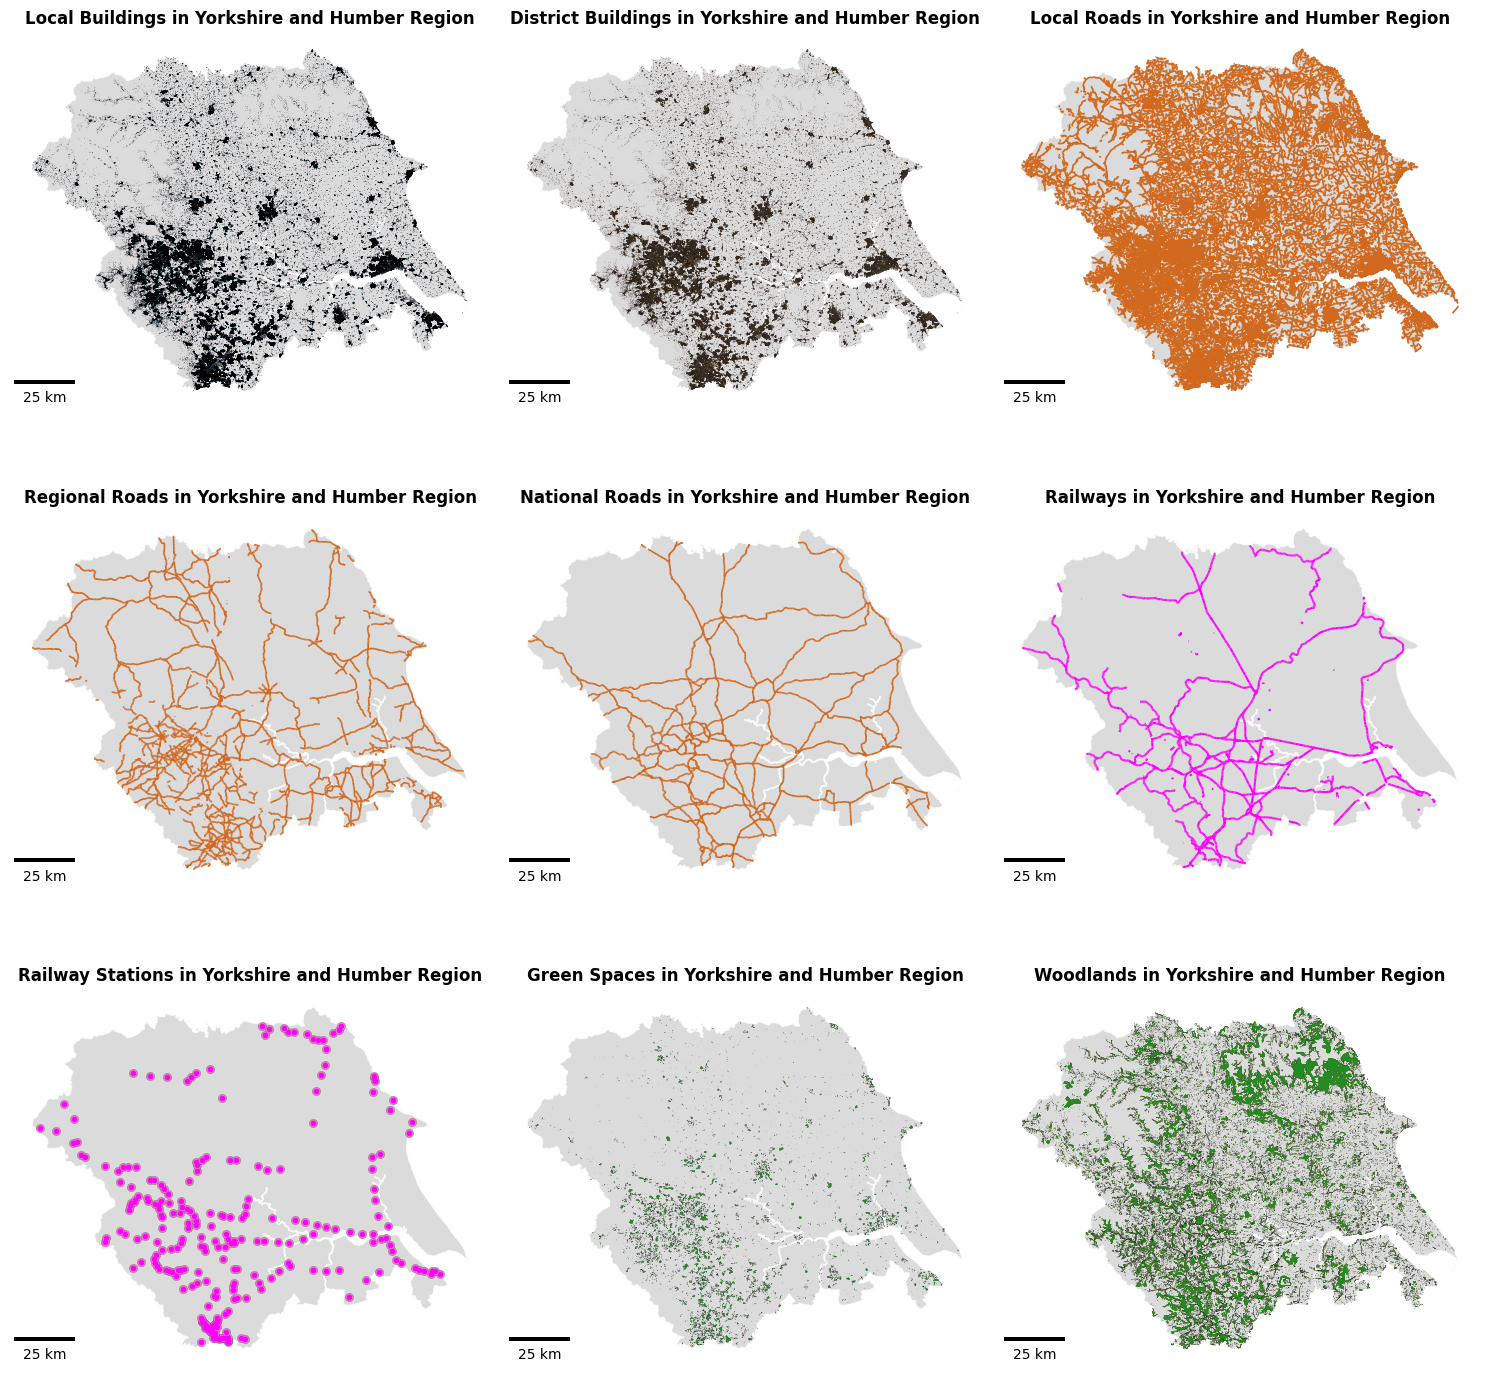

In [179]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
palette = sns.color_palette('tab10', n_colors= 9)

for i, (name, gdf) in enumerate(re_layers.items()):
    ax = axes[i]

    YorkshireAndHumber.plot(ax=ax, color='lightgrey', edgecolor='white', alpha=0.8)
    gdf.plot(ax=ax, color=palette[i], edgecolor='black', linewidth=0.1)

    if name in ['greenspace', 'woodland']:
        gdf.plot(ax=ax, color='forestgreen')
    elif 'roads' in name:
        gdf.plot(ax=ax, edgecolor='chocolate', linewidth=1.2)
    elif name == 'rail':
        gdf.plot(ax=ax, edgecolor='magenta', linewidth=1.5)
    elif name == 'railway_stations':
        gdf.plot(ax=ax, color='magenta', markersize=8)
    else:
        gdf.plot(ax=ax, color='dimgray')
    
    ax.set_title(f'{rename_dic[name]} in Yorkshire and Humber Region', fontsize=12, fontweight= 'bold')
    ax.set_axis_off()

    scalebar = ScaleBar(dx=1, location='lower left')
    ax.add_artist(scalebar)

plt.tight_layout()
plt.show()

## Pollution

In [266]:
Polluted= gpd.read_file('polluted_sites.geojson')

In [268]:
Polluted.head()

,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,geometry
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,NE-49000012,CALAIS BECK AT RUNSWICK BAY,2025-01-20 13:02:00,Nitrate-N,Nitrate as N,0117,,3.69,,mg/l,RIVER / RUNNING SURFACE WATER,false,PLANNED INVESTIGATION (LOCAL MONITORING),481309,515499,POINT (481309 515499)
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,NE-49000012,CALAIS BECK AT RUNSWICK BAY,2025-02-19 10:33:00,Nitrate-N,Nitrate as N,0117,,3.79,,mg/l,RIVER / RUNNING SURFACE WATER,false,PLANNED INVESTIGATION (LOCAL MONITORING),481309,515499,POINT (481309 515499)
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,NE-49000065,GYPSEY RACE AT WOLDGATE,2025-01-21 09:57:00,Nitrate-N,Nitrate as N,0117,,15.00,,mg/l,RIVER / RUNNING SURFACE WATER,false,MONITORING (NATIONAL AGENCY POLICY),516577,467546,POINT (516577 467546)
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,NE-49000065,GYPSEY RACE AT WOLDGATE,2025-02-25 10:08:00,Nitrate-N,Nitrate as N,0117,,14.00,,mg/l,RIVER / RUNNING SURFACE WATER,false,MONITORING (NATIONAL AGENCY POLICY),516577,467546,POINT (516577 467546)
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,NE-49000397,CLAYMOOR BECK AT RUNSWICK BAY,2025-01-20 12:55:00,Nitrate-N,Nitrate as N,0117,,7.09,,mg/l,RIVER / RUNNING SURFACE WATER,false,PLANNED INVESTIGATION (LOCAL MONITORING),481555,515459,POINT (481555 515459)


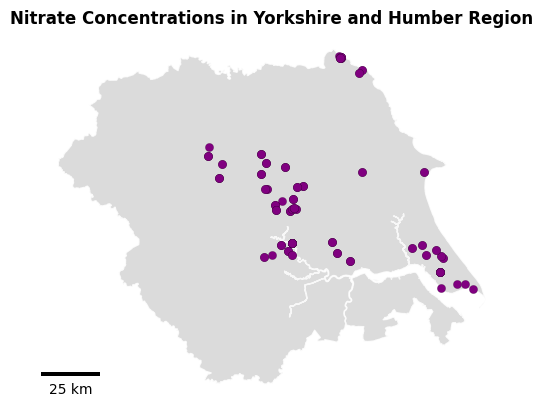

In [354]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

YorkshireAndHumber.plot(ax=ax, color='lightgrey', edgecolor='white', alpha=0.8)
Polluted.plot(ax=ax, color='purple', edgecolor='black', linewidth=0.1)

ax.set_title('Nitrate Concentrations in Yorkshire and Humber Region', fontsize=12, fontweight= 'bold')
ax.set_axis_off()

scalebar = ScaleBar(dx=1, location='lower left')
ax.add_artist(scalebar)

plt.tight_layout()
plt.show()

## 50m buffer of straight and high flood risk rivers

In [192]:
# Load straight rivers in high flood risk
rivers= gpd.read_file('rivers_highfloodrisk.geojson')

In [193]:
rivers.head()

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,RGN24CD,RGN24NM,BNG_E,BNG_N,LONG,LAT,GlobalID,index_right,priority,geometry
0,River Esk,3E023E15-5246-4637-B4EC-917DAC1DA343,0B2DFC58-AFA8-4D94-938B-9824D453CAC6,21E863CE-0E81-4718-81ED-5A4DF02C5C4E,inlandRiver,in direction,false,146,Arnecliff Pool,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,7381.0,High,"LINESTRING Z (-88692.617 7253787.068 0, -88607..."
1,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1020.0,High,"LINESTRING Z (-186522.456 7245158.1 0, -186489..."
2,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1021.0,High,"LINESTRING Z (-186522.456 7245158.1 0, -186489..."
3,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1020.0,High,"LINESTRING Z (-186489.996 7245078.582 0, -1864..."
4,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1021.0,High,"LINESTRING Z (-186489.996 7245078.582 0, -1864..."


In [194]:
rivers.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [195]:
rivers = rivers.to_crs(epsg=27700)

<Axes: >

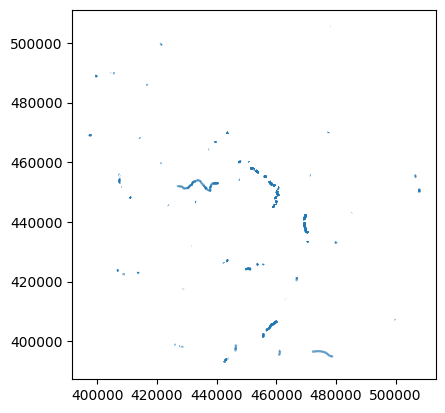

In [196]:
rivers.plot()

In [203]:
rivers_buffered= rivers.copy()

In [204]:
rivers_buffered.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [205]:
rivers_buffered['geometry'] = rivers_buffered.buffer(50)

In [206]:
rivers_buffered.head()

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,RGN24CD,RGN24NM,BNG_E,BNG_N,LONG,LAT,GlobalID,index_right,priority,geometry
0,River Esk,3E023E15-5246-4637-B4EC-917DAC1DA343,0B2DFC58-AFA8-4D94-938B-9824D453CAC6,21E863CE-0E81-4718-81ED-5A4DF02C5C4E,inlandRiver,in direction,false,146,Arnecliff Pool,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,7381.0,High,"POLYGON ((478184.035 505591.235, 478188.937 50..."
1,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1020.0,High,"POLYGON ((421229.246 499872.938, 421230.901 49..."
2,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1021.0,High,"POLYGON ((421229.246 499872.938, 421230.901 49..."
3,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1020.0,High,"POLYGON ((421244.761 499878.907, 421249.04 499..."
4,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.9327,098b1975-fc6b-4958-902e-c865e7b8ae48,1021.0,High,"POLYGON ((421244.761 499878.907, 421249.04 499..."


<Axes: >

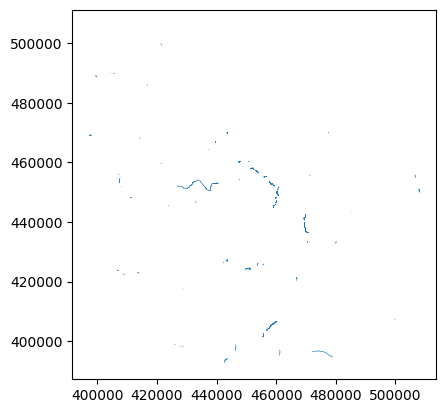

In [207]:
rivers_buffered.plot()

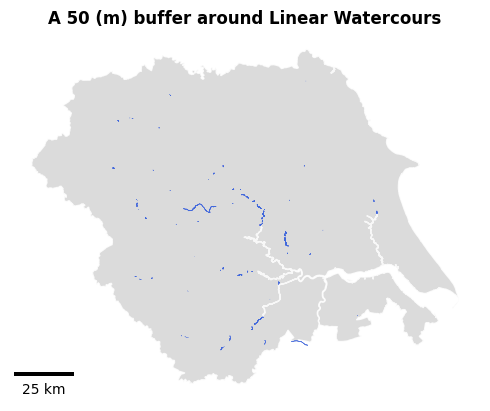

In [209]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

YorkshireAndHumber.plot(ax=ax, color='lightgrey', edgecolor='white', alpha=0.8)
rivers_buffered.plot(ax=ax, color='royalblue', edgecolor='royalblue', linewidth=0.1)

ax.set_title('A 50 (m) buffer around Linear Watercours', fontsize=12, fontweight= 'bold')
ax.set_axis_off()

scalebar = ScaleBar(dx=1, location='lower left')
ax.add_artist(scalebar)

plt.tight_layout()
plt.show()

In [210]:
rivers_buffered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5325 entries, 0 to 5324
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name1        5325 non-null   object  
 1   identifier   5325 non-null   object  
 2   startNode    5325 non-null   object  
 3   endNode      5325 non-null   object  
 4   form         5325 non-null   object  
 5   flow         5325 non-null   object  
 6   fictitious   5325 non-null   object  
 7   length       5325 non-null   int32   
 8   name2        5325 non-null   object  
 9   RGN24CD      5325 non-null   object  
 10  RGN24NM      5325 non-null   object  
 11  BNG_E        5325 non-null   int32   
 12  BNG_N        5325 non-null   int32   
 13  LONG         5325 non-null   float64 
 14  LAT          5325 non-null   float64 
 15  GlobalID     5325 non-null   object  
 16  index_right  5325 non-null   float64 
 17  priority     5325 non-null   object  
 18  geometry     5325 no

In [211]:
rivers_buffered.to_file('50_m_buffers_straighandhighfloodrisk.geojson')

### Clip Input Layers in 50m buffer of straight and high flood risk

In [212]:
layers_clipped_to_riversbuffer = {}

for name, gdf in re_layers.items():
    cl = gpd.clip(gdf, rivers_buffered)
    layers_clipped_to_riversbuffer[name] = cl


In [216]:
layers_clipped_to_riversbuffer.keys()

dict_keys(['local_buildings', 'district_buildings', 'roads_local', 'roads_regional', 'roads_national', 'rail', 'railway_stations', 'greenspace', 'woodland'])

In [221]:
layers_clipped_to_riversbuffer['local_buildings'].info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 558 entries, 841421 to 1223818
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   uuid      558 non-null    object  
 1   geometry  558 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 13.1+ KB


<Axes: >

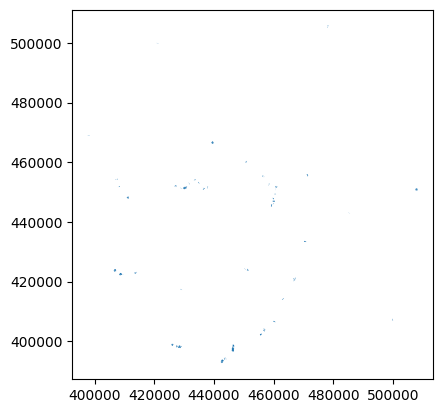

In [223]:
layers_clipped_to_riversbuffer['roads_local'].plot()

In [265]:
Land_Class_clipped_to_riversbuffer= gpd.clip(Land_Class, rivers_buffered)

In [225]:
region_built_up_clipped_to_riversbuffer= gpd.clip(region_built_up,rivers_buffered)

In [269]:
Polluted.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [270]:
Polluted_clipped_to_riversbuffer= gpd.clip(Polluted,rivers_buffered)

In [273]:
# Add the other layers to the dictionary, so having all clipped layers to calculate index in one dictionary 
layers_clipped_to_riversbuffer.update({
    'Land_Class': Land_Class_clipped_to_riversbuffer,
    'region_built_up': region_built_up_clipped_to_riversbuffer,
    'pollution': Polluted_clipped_to_riversbuffer
})


## Creating index

In [278]:
layers_clipped_to_riversbuffer.keys()

dict_keys(['local_buildings', 'district_buildings', 'roads_local', 'roads_regional', 'roads_national', 'rail', 'railway_stations', 'greenspace', 'woodland', 'region_built_up', 'pollution', 'Land_Class'])

In [279]:
index_table = rivers_buffered.copy()

In [280]:
layers_clipped_to_riversbuffer['Land_Class'].head()

,OBJECTID_1,OBJECTID,GEOGEXT,JOB_NUMBER,RPT,ALC_GRADE,HECTARES,RPT_JOBNUM,Published_,geometry
27492,27493,27493,91,040\93,Leeds,Other,9.67,Leeds_040\93,http://publications.naturalengland.org.uk/publ...,"POLYGON ((461067.913 396827.213, 461116.914 39..."
27483,27484,27484,91,040\93,Leeds,Grade 2,10.37,Leeds_040\93,http://publications.naturalengland.org.uk/publ...,"POLYGON ((461153.914 396789.213, 461140.914 39..."
27449,27450,27450,91,040\93,Leeds,Grade 3a,144.51,Leeds_040\93,http://publications.naturalengland.org.uk/publ...,"MULTIPOLYGON (((461291.917 396354.208, 461287...."
30270,30271,30271,9,023\93,Leeds,Grade 3b,6.11,Leeds_023\93,http://publications.naturalengland.org.uk/publ...,"POLYGON ((430925.616 451912.701, 430948.34 451..."
30114,30115,30115,9,005\98,Leeds,Grade 3b,22.09,Leeds_005\98,http://publications.naturalengland.org.uk/publ...,"MULTIPOLYGON (((433743.615 454024.312, 433752...."


In [282]:
layers_clipped_to_riversbuffer['Land_Class']['ALC_GRADE'].value_counts()

ALC_GRADE
Other       6
Grade 3b    6
Grade 3a    5
Grade 4     3
Grade 2     2
Name: count, dtype: int64

In [283]:
alc_grade_weights = {
    'Grade 2': 0.05,
    'Grade 3a': 0.10,
    'Grade 3b': 0.15,
    'Grade 4': 0.20,
    'Other': 0.10      
}

In [ ]:
# Define a function to calculate the wieght out of the land_class grades in the buffer polygons   (Use GenAI to write the function)
def get_land_class_weight(geom, land_class_gdf):
    overlapping = land_class_gdf[land_class_gdf.intersects(geom)]
    if overlapping.empty:
        return 0
    grades = overlapping['ALC_GRADE'].dropna()
    weights = [alc_grade_weights.get(geom, 0) for geom in grades]
    return sum(weights)/len(weights)  #  get the average weight

In [285]:
index_table['Land_Class'] = index_table.geometry.apply(
    lambda geom: get_land_class_weight(geom, layers_clipped_to_riversbuffer['Land_Class'])
)


In [288]:
index_table['Land_Class'].describe()

count    5325.000000
mean        0.035480
std         0.062979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         0.200000
Name: Land_Class, dtype: float64

In [290]:
# Add a column per layer: 1 if intersecting, 0 otherwise
for layer_name, gdf in layers_clipped_to_riversbuffer.items():
    if layer_name != 'Land_Class':  
        index_table[layer_name] = index_table.geometry.apply(
            lambda geom: gdf.intersects(geom).any()
        ).astype(int)


In [291]:
index_table.head()

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,RGN24CD,...,district_buildings,roads_local,roads_regional,roads_national,rail,railway_stations,greenspace,woodland,region_built_up,pollution
0,River Esk,3E023E15-5246-4637-B4EC-917DAC1DA343,0B2DFC58-AFA8-4D94-938B-9824D453CAC6,21E863CE-0E81-4718-81ED-5A4DF02C5C4E,inlandRiver,in direction,false,146,Arnecliff Pool,E12000003,...,0,1,0,0,0,0,0,1,0,0
1,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,...,1,1,1,0,0,0,0,1,0,0
2,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,...,1,1,1,0,0,0,0,1,0,0
3,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,...,0,0,1,0,0,0,0,1,0,0
4,Skeeby Beck,234CA58C-D727-4E7B-9315-A5A40A7A15FE,B737DBB5-CBBC-42E3-A44F-46C7E651EE55,10738035-70F1-4C0D-92F7-42C7665B3C0C,inlandRiver,in direction,false,141,Mill Wath,E12000003,...,0,0,1,0,0,0,0,1,0,0


In [292]:
layer_weights = {
    'Land_Class': 0.25,
    'greenspace': 0.14,
    'woodland': 0.13,
    'pollution': 0.10,
    'region_built_up': 0.08,
    'roads_local': 0.06,
    'local_buildings': 0.06,
    'district_buildings': 0.05,
    'roads_regional': 0.04,
    'roads_national': 0.03,
    'rail': 0.03,
    'railway_stations': 0.03
}


In [295]:
# Calculate the index
for layer, weight in layer_weights.items():
    index_table[layer] = index_table[layer] * weight

index_table['Re-meandering Index'] = sum(index_table[layer] for layer in layer_weights)


In [296]:
index_table['Re-meandering Index'].describe()

count    5325.000000
mean        0.134093
std         0.121040
min         0.000000
25%         0.000000
50%         0.130000
75%         0.190000
max         0.590000
Name: Re-meandering Index, dtype: float64

In [298]:
def classify_priority(index):
    if index >= 0.20:
        return 'High Priority'
    elif index >= 0.10:
        return 'Medium Priority'
    else:
        return 'Low Priority'

index_table['Priority'] = index_table['Re-meandering Index'].apply(classify_priority)

In [299]:
index_table.to_file("re_meandering_index.geojson", driver='GeoJSON')

## Mapping the findings

In [309]:
watercourse= gpd.read_file('WatercourseLink.shp')

In [310]:
watercourse.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [311]:
regionwater=gpd.clip(watercourse,YorkshireAndHumber)

In [312]:
regionwater.head()

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
107202,None,67EE4517-6762-4A90-8965-FF906973EEEA,31ECE843-DE6E-4FC7-B4CC-4F7E27FE4B4F,BB39C687-FE18-4770-90D3-63CE66074C14,lake,in direction,false,1109,None,"LINESTRING Z (448384.04 379838.23 0, 448401.62..."
107200,None,5E656DA1-D9EC-4FCD-BBA5-E7DC7F57051C,08515F86-3BD1-4B35-8F3C-7DBDA9A462D4,7F4CC897-A006-428E-A131-8734DDFC5D0B,inlandRiver,in direction,false,57,None,"LINESTRING Z (447790.7 380871.31 0, 447733.89 ..."
107198,None,2A859662-C17C-428B-B99B-FAFFF045A2C6,7F4CC897-A006-428E-A131-8734DDFC5D0B,EF44D50D-441B-4074-9068-BE10E58FBA3A,lake,in direction,false,279,None,"LINESTRING Z (447733.89 380874.86 0, 447700.62..."
107197,None,B7492387-C5FF-4B90-B105-8596E899EFA9,EF44D50D-441B-4074-9068-BE10E58FBA3A,18D2AF2A-1638-417B-B0DB-CC7BBE68FE9F,inlandRiver,in direction,false,20,None,"LINESTRING Z (447652.98 381138.78 0, 447653.2 ..."
107199,None,2CA1B0DD-BC24-47D4-BD31-8A95B036D88D,1ABC3E81-597D-44D2-B4D0-DF966F4BD3CC,18D2AF2A-1638-417B-B0DB-CC7BBE68FE9F,inlandRiver,in direction,false,13,None,"LINESTRING Z (447665.82 381159.99 0, 447653.2 ..."


In [313]:
regionwater['form'].value_counts()

form
inlandRiver    9807
lake           1096
canal           178
tidalRiver       71
Name: count, dtype: int64

In [317]:
Ri = regionwater[regionwater['form'].isin({'inlandRiver', 'tidalRiver'})]

In [319]:
if 'index_right' in index_table.columns:
    index_table = index_table.drop(columns='index_right')

In [320]:
# Join rivers in the region with the index table
rivers_J = gpd.sjoin(Ri, index_table, how='left', predicate='intersects')

In [321]:
rivers_J['Re-meandering Index'] = rivers_J['Re-meandering Index'].fillna(0)
rivers_J['Priority'] = rivers_J['Priority'].fillna('No Priority')

In [323]:
# Make an order for plotting
from pandas.api.types import CategoricalDtype 

priority_order = CategoricalDtype(['High Priority', 'Medium Priority', 'Low Priority', 'No Priority'], ordered=True)

rivers_J['Priority'] = rivers_J['Priority'].astype(priority_order)

In [325]:
rivers_J.to_file('rivers_meandering_index.geojson', driver='GeoJSON')

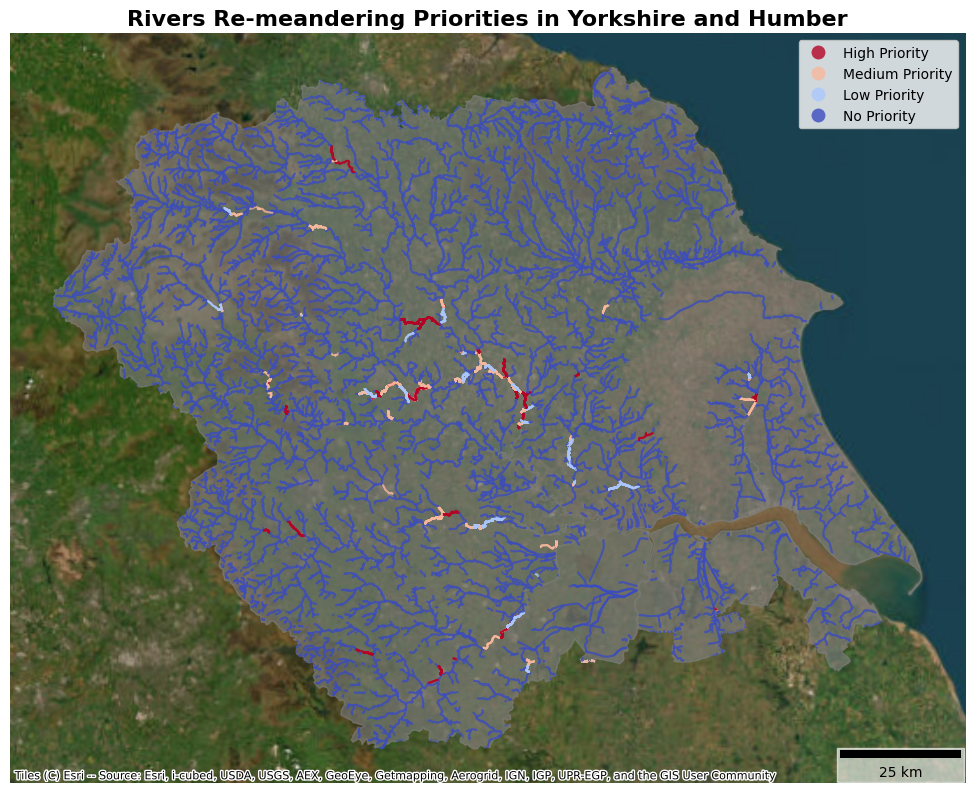

In [356]:
fig, ax = plt.subplots(figsize=(10, 8))

rivers_J.plot(ax=ax, column='Priority', cmap='coolwarm_r', legend=True,linewidth=1.5, alpha=0.8)
YorkshireAndHumber.plot(ax=ax, color='gray', edgecolor='gray', alpha=0.6)


ax.set_title('Rivers Re-meandering Priorities in Yorkshire and Humber', fontsize=16, fontweight='bold')
ax.set_axis_off()

scalebar = ScaleBar(1, location='lower right', box_alpha=0.6)
ax.add_artist(scalebar)

cx.add_basemap(ax, crs='EPSG:27700', source= cx.providers.Esri.WorldImagery)

plt.tight_layout()
plt.show()

In [357]:
rivers_J.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [358]:
rivers_J['river_length'] = rivers_J.geometry.length

In [359]:
grouped_by_priority = rivers_J.groupby('Priority').agg(
    total_length=('river_length', 'sum'),
    count_rivers=('geometry', 'count')
).reset_index()

/var/folders/wd/1wf586s93vg1fbnl295w_w1r0000gn/T/ipykernel_88966/3814844141.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_priority = rivers_J.groupby('Priority').agg(


In [361]:
priority_order = ['High Priority', 'Medium Priority', 'Low Priority', 'No Priority']
grouped_by_priority['Priority'] = pd.Categorical(grouped_by_priority['Priority'], categories=priority_order, ordered=True)
grouped_by_priority = grouped_by_priority.sort_values('Priority')

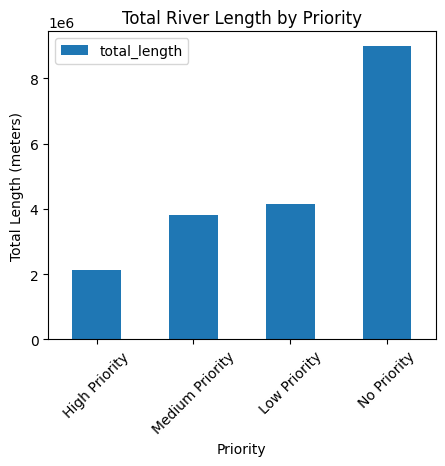

In [373]:
fig, ax = plt.subplots(figsize=(5,4))
grouped_by_priority.plot(kind='bar', x='Priority', y='total_length', ax=ax)
plt.title('Total River Length by Priority')
plt.xlabel('Priority')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.ylabel('Total Length (meters)')
plt.show()
 

## References

https://naturalengland-defra.opendata.arcgis.com/datasets/Defra::agricultural-land-classification-alc-grades-post-1988-england/explore?location=52.766064%2C-1.816292%2C6.86

https://api.os.uk/downloads/v1/products/BuiltUpAreas

https://osdatahub.os.uk/downloads/open/OpenZoomstack?_gl=1*18fy17q*_gcl_au*MTA4ODMzOTQ1OS4xNzQwMzA3NTc4*_ga*MTEwNDc5ODMwMS4xNzQwMzA3NTUy*_ga_59ZBN7DVBG*MTc0MjY0NTgyMy4yLjEuMTc0MjY0NTg3Mi4xMS4wLjA.*_ga_E5T3PCFCG7*MTc0MjY0NTgyMy4xLjEuMTc0MjY0NTg3Mi4wLjAuMA..
